In [0]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
import keras
import numpy as np

from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K
!pip install keras_metrics
import keras_metrics

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
     |████████████████████████████████| 512kB 50.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=585e17056452da08f2a27cc937497cce11322e5e088d00119c05fcf0729c1081
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installatio

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
def read_data():
  link = 'https://drive.google.com/open?id=1d2o9uC_UsEx0wOLy4YuwyucM3Yc-vze7'
  fluff, id = link.split('=')
  print (id)
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('spam.csv')  
  df = pd.read_csv('spam.csv', encoding='latin-1')
  df['v1'] = df.v1.map({'ham': 0, 'spam': 1})
  msk = np.random.rand(len(df)) < 0.8
  df_train = df[msk]
  df_test = df[~msk]
  train_sentences = df_train.v2.values
  train_labels = df_train.v1.values
  test_sentences = df_test.v2.values
  test_labels = df_test.v1.values
  return df,train_sentences,train_labels,test_sentences,test_labels


In [0]:
df,train_sentences,train_labels,test_sentences,test_labels = read_data()

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

1d2o9uC_UsEx0wOLy4YuwyucM3Yc-vze7


In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
train_sentences = [word_tokenize(s) for s in train_sentences]
nltk.download('stopwords')
# pre_sen = []
# for tokens in train_sentences:
#   tokens = [w.lower() for w in tokens]
#   import string
#   table = str.maketrans('', '', string.punctuation)
#   stripped = [w.translate(table) for w in tokens]
#   # remove remaining tokens that are not alphabetic
#   words = [word for word in stripped if word.isalpha()]
#   # filter out stop words
#   from nltk.corpus import stopwords
#   stop_words = set(stopwords.words('english'))
#   words = [w for w in words if not w in stop_words]
#   pre_sen.append(words)
# train_sentences = pre_sen

t_sen = []
for s in train_sentences:
  if(len(s)<128):
    t_sen.append(TreebankWordDetokenizer().detokenize(s))
  else:
    t_sen.append(TreebankWordDetokenizer().detokenize(s[0:127]))
train_sentences = t_sen

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
test_sentences = [word_tokenize(s) for s in test_sentences]
# pre_sen = []
# for tokens in test_sentences:
#   tokens = [w.lower() for w in tokens]
#   import string
#   table = str.maketrans('', '', string.punctuation)
#   stripped = [w.translate(table) for w in tokens]
#   # remove remaining tokens that are not alphabetic
#   words = [word for word in stripped if word.isalpha()]
#   # filter out stop words
#   from nltk.corpus import stopwords
#   stop_words = set(stopwords.words('english'))
#   words = [w for w in words if not w in stop_words]
#   pre_sen.append(words)
# test_sentences = pre_sen

t_sen = []
for s in test_sentences:
  if(len(s)<128):
    t_sen.append(TreebankWordDetokenizer().detokenize(s))
  else:
    t_sen.append(TreebankWordDetokenizer().detokenize(s[0:127]))
test_sentences = t_sen

In [0]:
url = "https://tfhub.dev/google/elmo/2"
embed = hub.Module(url,trainable=True)

In [0]:
def prepare_onehot():
  x_train = np.asarray(train_sentences)
  y_train = np.asarray(keras.utils.to_categorical(train_labels))
  x_test = np.asarray(test_sentences)
  y_test = np.asarray(keras.utils.to_categorical(test_labels))
  return x_train,y_train,x_test,y_test
x_train,y_train,x_test,y_test = prepare_onehot()

In [0]:
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]
def create_model():
  input_text = Input(shape=(1,), dtype=tf.string)
  embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
  dense = Dense(1024, activation='relu')(embedding)
  # dense2 = Dense(128, activation='relu')(dense)
  pred = Dense(2, activation='softmax')(dense)
  model = Model(inputs=[input_text], outputs=pred)
  ada = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model


## **10 epochs**

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
model = create_model()
history = model.fit(x_train, y_train, validation_data = (x_test,y_test) , epochs=10, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4441 samples, validate on 1131 samples
Epoch 1/10
4441/4441 [==============================] - 47s 10ms/step - loss: 0.3838 - accuracy: 0.8440 - val_loss: 0.1977 - val_accuracy: 0.9425
Epoch 2/10
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1878 - accuracy: 0.9406 - val_loss: 0.1219 - val_accuracy: 0.9584
Epoch 3/10
4441/4441 [==============================] - 43s 10ms/step - loss: 0.1401 - accuracy: 0.9543 - val_loss: 0.1088 - val_accuracy: 0.9699
Epoch 4/10
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1203 - accuracy: 0.9597 - val_loss: 0.1046 - val_accuracy: 0.9744
Epoch 5/10
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1021 - accuracy: 0.9678 - val_loss: 0.0913 - val_accuracy: 0.9699
Epoch 6/10
4441/4441 [==============================] - 45s 10ms/step - loss: 0.0944 - accuracy: 0.9698 - val_loss: 0.0818 - val_accuracy: 0.9744
Epoch 7/10
4441/4441 [==============================] - 44s 10ms/step - loss

In [0]:
model.save_weights('./elmo-model_spam_pre.h5')
# model = create_model()
# link = 'https://drive.google.com/open?id=1LD8HlgS7Lk8Ty7_F6x6x9wSmPwEVXk_w'
# fluff, id = link.split('=')
# print (id)
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('elmo-model.h5')  
# model.load_weights('elmo-model.h5')
#  predicts = model.predict(x_test, batch_size=32)

In [0]:
predict = model.predict(x_test)

In [0]:
pred = [np.where(t == np.max(t))[0][0] for t in predict]

In [0]:
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

AUC :  0.9593407915313364
accuracy :  0.9725906277630415
precision :  0.8674698795180723
recall :  0.9411764705882353
F1 :  0.9028213166144202


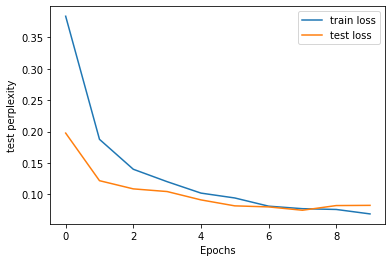

In [0]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist=history.history
loss=hist['loss']
val_loss=hist['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

## **20 epochs**

In [0]:
model2 = create_model()
history2 = model2.fit(x_train, y_train,validation_data = (x_test,y_test) , epochs=20, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4441 samples, validate on 1131 samples
Epoch 1/20
4441/4441 [==============================] - 46s 10ms/step - loss: 0.2807 - accuracy: 0.8888 - val_loss: 0.1372 - val_accuracy: 0.9576
Epoch 2/20
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1466 - accuracy: 0.9502 - val_loss: 0.1082 - val_accuracy: 0.9567
Epoch 3/20
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1284 - accuracy: 0.9565 - val_loss: 0.1265 - val_accuracy: 0.9540
Epoch 4/20
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1299 - accuracy: 0.9590 - val_loss: 0.0992 - val_accuracy: 0.9549
Epoch 5/20
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1020 - accuracy: 0.9640 - val_loss: 0.0814 - val_accuracy: 0.9770
Epoch 6/20
4441/4441 [==============================] - 45s 10ms/step - loss: 0.0849 - accuracy: 0.9716 - val_loss: 0.0809 - val_accuracy: 0.9770
Epoch 7/20
4441/4441 [==============================] - 46s 10ms/step - loss

In [0]:
model2.save_weights('./elmo-model_spam2.h5')
# model2.load_weights('./elmo-model_spam2.h5')
# predicts2 = model2.predict(x_test, batch_size=32)

In [0]:
predicts2 = model2.predict(x_test)

AUC :  0.9576065600064156
accuracy :  0.9743589743589743
precision :  0.8827160493827161
recall :  0.934640522875817
F1 :  0.9079365079365078


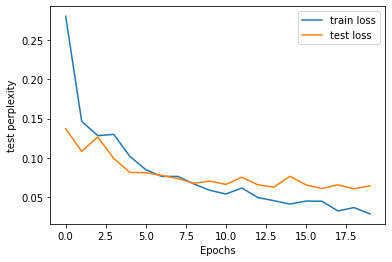

In [0]:
pred = [np.where(t == np.max(t))[0][0] for t in predicts2]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history2.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

## **50 epochs**

In [0]:
model50 = create_model()
history50 = model50.fit(x_train, y_train, epochs=50,validation_data = (x_test,y_test), batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4441 samples, validate on 1131 samples
Epoch 1/50
4441/4441 [==============================] - 46s 10ms/step - loss: 0.2820 - accuracy: 0.9099 - val_loss: 0.1345 - val_accuracy: 0.9531
Epoch 2/50
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1441 - accuracy: 0.9500 - val_loss: 0.1086 - val_accuracy: 0.9699
Epoch 3/50
4441/4441 [==============================] - 44s 10ms/step - loss: 0.1191 - accuracy: 0.9601 - val_loss: 0.0968 - val_accuracy: 0.9726
Epoch 4/50
4441/4441 [==============================] - 42s 9ms/step - loss: 0.1074 - accuracy: 0.9637 - val_loss: 0.0874 - val_accuracy: 0.9717
Epoch 5/50
4441/4441 [==============================] - 45s 10ms/step - loss: 0.0920 - accuracy: 0.9707 - val_loss: 0.0825 - val_accuracy: 0.9717
Epoch 6/50
4441/4441 [==============================] - 44s 10ms/step - loss: 0.0811 - accuracy: 0.9716 - val_loss: 0.0776 - val_accuracy: 0.9752
Epoch 7/50
4441/4441 [==============================] - 46s 10ms/step - loss:

In [0]:
predicts50 = model50.predict(x_test)

AUC :  0.9489354023818115
accuracy :  0.9832007073386384
precision :  0.971830985915493
recall :  0.9019607843137255
F1 :  0.9355932203389831


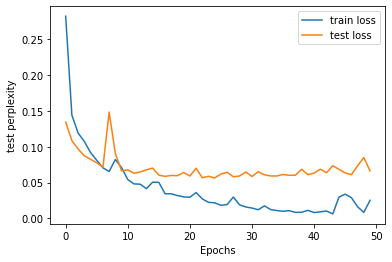

In [0]:
pred = [np.where(t == np.max(t))[0][0] for t in predicts50]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history50.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

## **without pretraining**

In [0]:
model_pre = create_model()
history_pre = model_pre.fit(x_train, y_train,validation_data = (x_test,y_test) , epochs=10, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4392 samples, validate on 1180 samples
Epoch 1/10
4392/4392 [==============================] - 112s 25ms/step - loss: 0.2249 - accuracy: 0.8996 - val_loss: 0.1086 - val_accuracy: 0.9737
Epoch 2/10
4392/4392 [==============================] - 93s 21ms/step - loss: 0.0799 - accuracy: 0.9740 - val_loss: 0.0700 - val_accuracy: 0.9737
Epoch 3/10
4392/4392 [==============================] - 93s 21ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0583 - val_accuracy: 0.9797
Epoch 4/10
4392/4392 [==============================] - 88s 20ms/step - loss: 0.0574 - accuracy: 0.9804 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 5/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 6/10
4392/4392 [==============================] - 85s 19ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0339 - val_accuracy: 0.9915
Epoch 7/10
4392/4392 [==============================] - 83s 19ms/step - los

In [0]:
predict_pre = model_pre.predict(x_test)

AUC :  0.977034259823534
accuracy :  0.9906779661016949
precision :  0.9655172413793104
recall :  0.958904109589041
F1 :  0.9621993127147767


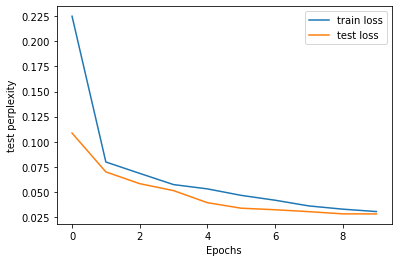

In [0]:
pred = [np.where(t == np.max(t))[0][0] for t in predict_pre]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history_pre.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

## **بخش امتیازی**

In [0]:
def create_model2():
  input_text = Input(shape=(1,), dtype=tf.string)
  embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
  dense = Dense(512, activation='relu')(embedding)
  dense2 = Dense(1024, activation='relu')(dense)
  pred = Dense(2, activation='softmax')(dense2)
  model = Model(inputs=[input_text], outputs=pred)
  ada = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model

In [0]:
model3 = create_model2()
history3 = model3.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=10, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4392 samples, validate on 1180 samples
Epoch 1/10
4392/4392 [==============================] - 87s 20ms/step - loss: 0.2025 - accuracy: 0.9258 - val_loss: 0.0669 - val_accuracy: 0.9754
Epoch 2/10
4392/4392 [==============================] - 86s 20ms/step - loss: 0.0830 - accuracy: 0.9713 - val_loss: 0.0477 - val_accuracy: 0.9847
Epoch 3/10
4392/4392 [==============================] - 85s 19ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 4/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 5/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.0344 - accuracy: 0.9902 - val_loss: 0.0282 - val_accuracy: 0.9924
Epoch 6/10
4392/4392 [==============================] - 87s 20ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0259 - val_accuracy: 0.9924
Epoch 7/10
4392/4392 [==============================] - 86s 19ms/step - loss

AUC :  0.977034259823534
accuracy :  0.9906779661016949
precision :  0.9655172413793104
recall :  0.958904109589041
F1 :  0.9621993127147767


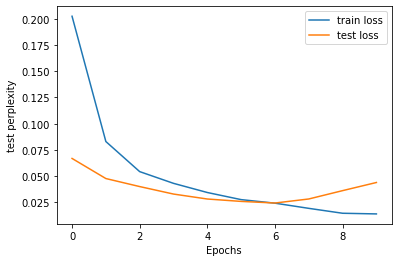

In [0]:
predicts3 = model3.predict(x_test)
pred = [np.where(t == np.max(t))[0][0] for t in predicts3]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history3.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

In [0]:
def create_model3():
  input_text = Input(shape=(1,), dtype=tf.string)
  embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
  dense = Dense(64, activation='relu')(embedding)
  dense2 = Dense(128, activation='relu')(dense)
  dense3 = Dense(256, activation='relu')(dense2)
  dense4 = Dense(512, activation='relu')(dense3)
  dense5 = Dense(1024, activation='relu')(dense4)
  pred = Dense(2, activation='softmax')(dense5)
  model = Model(inputs=[input_text], outputs=pred)
  ada = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model

In [0]:
model4 = create_model3()
history4 = model4.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=10, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4392 samples, validate on 1180 samples
Epoch 1/10
4392/4392 [==============================] - 87s 20ms/step - loss: 0.3276 - accuracy: 0.8632 - val_loss: 0.2096 - val_accuracy: 0.8763
Epoch 2/10
4392/4392 [==============================] - 83s 19ms/step - loss: 0.1341 - accuracy: 0.9476 - val_loss: 0.0696 - val_accuracy: 0.9780
Epoch 3/10
4392/4392 [==============================] - 86s 19ms/step - loss: 0.0766 - accuracy: 0.9756 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 4/10
4392/4392 [==============================] - 85s 19ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0545 - val_accuracy: 0.9839
Epoch 5/10
4392/4392 [==============================] - 85s 19ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 6/10
4392/4392 [==============================] - 82s 19ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0364 - val_accuracy: 0.9890
Epoch 7/10
4392/4392 [==============================] - 86s 20ms/step - loss

AUC :  0.9770740043983996
accuracy :  0.985593220338983
precision :  0.9215686274509803
recall :  0.9657534246575342
F1 :  0.94314381270903


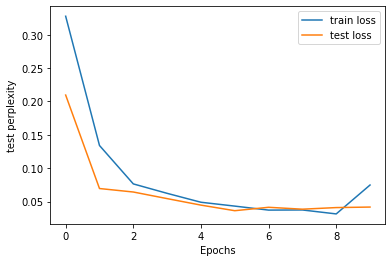

In [0]:
predicts4 = model4.predict(x_test)
pred = [np.where(t == np.max(t))[0][0] for t in predicts4]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history4.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

In [0]:
def create_model4():
  input_text = Input(shape=(1,), dtype=tf.string)
  embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
  dense = Dense(16, activation='relu')(embedding)
  dense1 = Dense(32, activation='relu')(dense)
  dense2 = Dense(64, activation='relu')(dense1)
  dense3 = Dense(128, activation='relu')(dense2)
  dense4 = Dense(256, activation='relu')(dense3)
  dense5 = Dense(512, activation='relu')(dense4)
  dense6 = Dense(1024, activation='relu')(dense5)
  pred = Dense(2, activation='softmax')(dense6)
  model = Model(inputs=[input_text], outputs=pred)
  ada = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model

In [0]:
model5 = create_model4()
history5 = model5.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=10, batch_size=200)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Train on 4392 samples, validate on 1180 samples
Epoch 1/10
4392/4392 [==============================] - 88s 20ms/step - loss: 0.4458 - accuracy: 0.8270 - val_loss: 0.2643 - val_accuracy: 0.8763
Epoch 2/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.2484 - accuracy: 0.8632 - val_loss: 0.1730 - val_accuracy: 0.8763
Epoch 3/10
4392/4392 [==============================] - 83s 19ms/step - loss: 0.1460 - accuracy: 0.9392 - val_loss: 0.1161 - val_accuracy: 0.9636
Epoch 4/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.1003 - accuracy: 0.9684 - val_loss: 0.0787 - val_accuracy: 0.9771
Epoch 5/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.0735 - accuracy: 0.9752 - val_loss: 0.0622 - val_accuracy: 0.9797
Epoch 6/10
4392/4392 [==============================] - 84s 19ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0679 - val_accuracy: 0.9805
Epoch 7/10
4392/4392 [==============================] - 85s 19ms/step - loss

AUC :  0.9727219734506241
accuracy :  0.9779661016949153
precision :  0.8703703703703703
recall :  0.9657534246575342
F1 :  0.9155844155844156


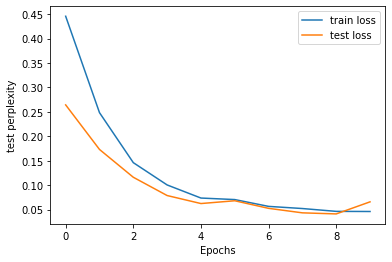

In [0]:
predicts5 = model5.predict(x_test)
pred = [np.where(t == np.max(t))[0][0] for t in predicts5]
yr = [np.where(t == np.max(t))[0][0] for t in y_test]

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yr, pred, pos_label=1)
print("AUC : ",metrics.auc(fpr, tpr))

from sklearn.metrics import accuracy_score
print("accuracy : ",accuracy_score(yr,pred))

from sklearn.metrics import precision_score
print("precision : ",precision_score(yr, pred))

from sklearn.metrics import recall_score
print("recall : " ,recall_score(yr, pred) )

from sklearn.metrics import f1_score
print("F1 : ", f1_score(yr, pred))

import matplotlib.pyplot as plt
import numpy as np
import math
hist2=history5.history
loss=hist2['loss']
val_loss=hist2['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])